# Desafío 3: Naive Bayes Bernoulli

## Aplicamos el modelo `BernoulliNB` de `scikit-learn` a los datos de intenciones de compras en línea.

## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
# en Anaconda: comentar esta celda
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# para Anaconda:
path = ''

# para Cristian en Colab:
path='gdrive/My Drive/DataScience - DH/Desafio3/'
# para Juan en Colab:
path='gdrive/My Drive/Desafio3/'



---



---



## BernoulliNB con `sklearn`

Aplicamos sobre los datos de test, la transformación para estandarizar valores, de igual manera que en train, para mantener la consistencia de tipos de datos.

In [0]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import savefig
import seaborn as sb
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pickle

In [0]:
df = pd.read_pickle('{}online_shoppers_intention_dummies.pkl'.format(path))

**Definimos las variables**

In [0]:
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
       'New_Visitor', 'Returning_Visitor', 'Weekend_True']]
y = df["Revenue"]

**Exploracion de variables**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


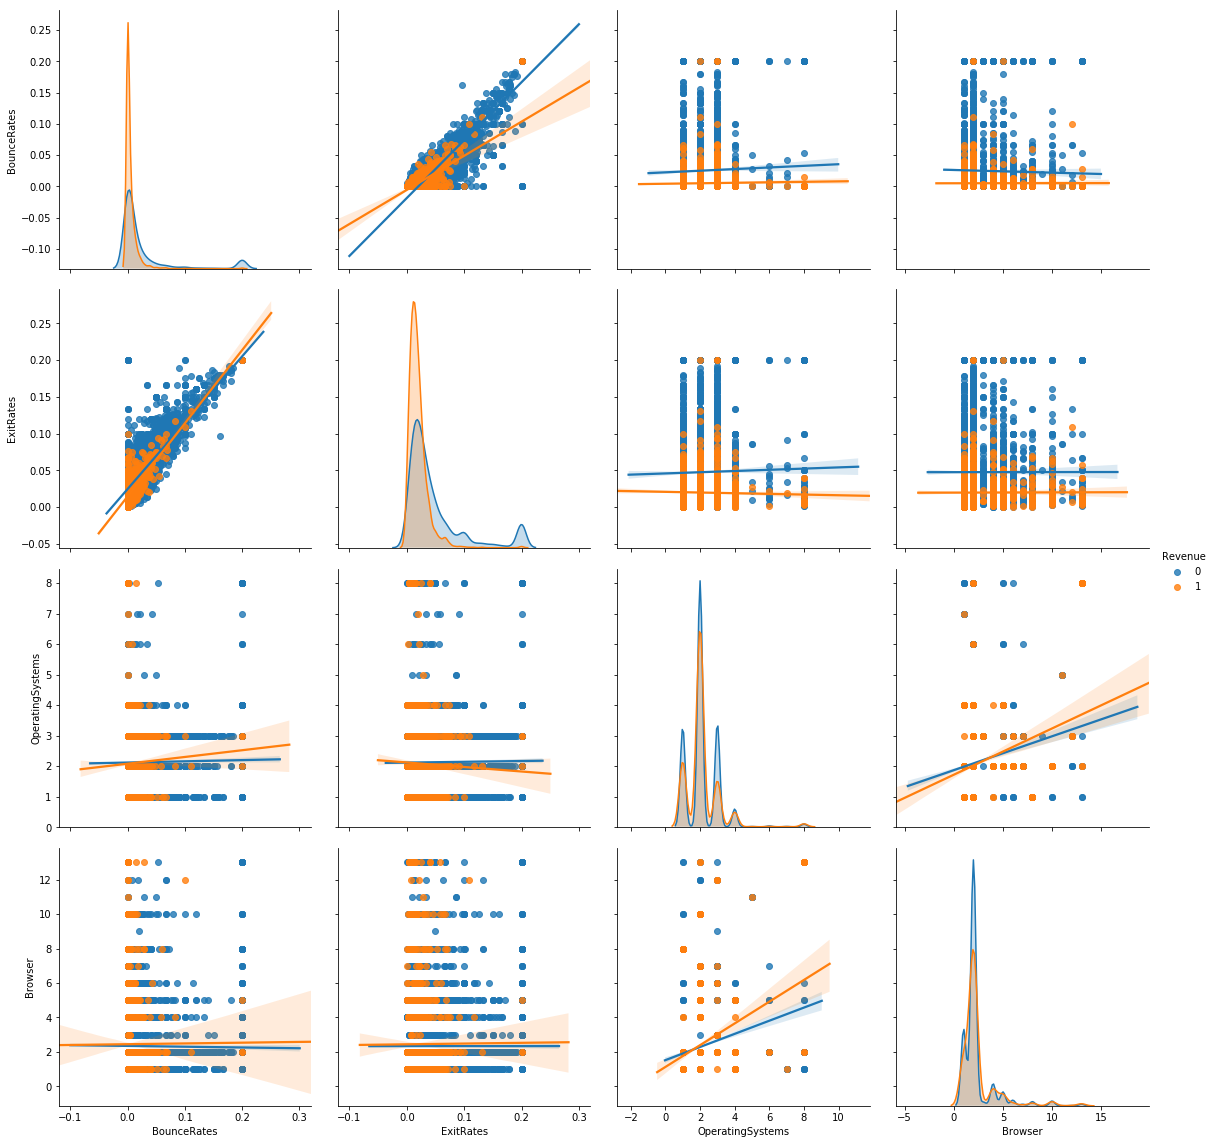

In [0]:
sb.pairplot(df,hue='Revenue',size=4,vars=["BounceRates", "ExitRates","OperatingSystems","Browser"],kind='reg')

**Entrenamiento de modelo De bernoulli**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
model = BernoulliNB()
model.fit(X, y);



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
result = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Matrix de Confusion**

0.8532809043991153


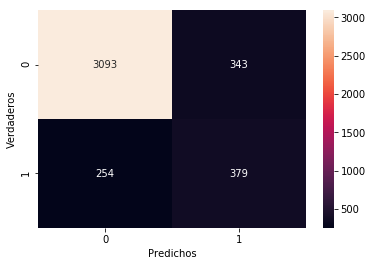

In [0]:
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g")
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[3093  343]
 [ 254  379]]


**Score**

In [0]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [0]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.8532809043991153
0.8532809043991153


In [0]:
class_error = (FP + FN) / float(TP + TN + FP + FN)

print(class_error)
print(1 - accuracy_score(y_test, y_pred))

0.14671909560088472
0.1467190956008847


**F1 Score**

In [0]:
from sklearn.metrics import f1_score

# f1 = 2*((precision*sensitivity)/(precision+sensitivity))
print('F1 score = {}'.format(f1_score(y_test,y_pred)))

F1 score = 0.5594095940959409


**Roc Score**

In [0]:
from sklearn.metrics import roc_auc_score, classification_report

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3436
           1       0.52      0.60      0.56       633

    accuracy                           0.85      4069
   macro avg       0.72      0.75      0.74      4069
weighted avg       0.86      0.85      0.86      4069



Bernoulli Regression (área = 0.75)


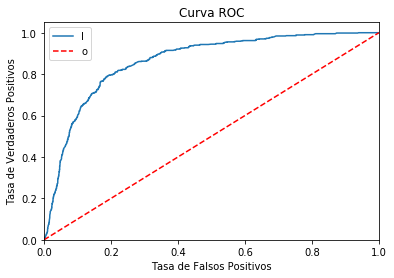

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('Bernoulli Regression (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='Bernoulli Regression (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC' + ' Bernoulli (área = %0.2f)' % logit_roc_auc)
plt.legend("lower right")
plt.savefig("{}Bernoulli_Regression_ROC.png".format(path), dpi=400)
plt.show()